In [4]:
import pandas as pd
import folium
from folium.plugins import HeatMap

# URL of the Excel file on GitHub
url = 'Bailey_Python.xlsx'

# Read the Excel file from the GitHub URL
df = pd.read_excel(url)

# Drop rows with NaN values in the relevant columns
df = df.dropna(subset=['lat', 'lon', 'ppm'])

# Display the first few rows to ensure it's loaded correctly and NaNs are removed
print(df.head())

# Create a base map centered around the average latitude and longitude
m = folium.Map(location=[df['lat'].mean(), df['lon'].mean()], zoom_start=10)

# Prepare the data for the heatmap
heat_data = [[row['lat'], row['lon'], row['ppm']] for index, row in df.iterrows()]

# Add the heatmap layer to the map with adjusted intensity
HeatMap(
    heat_data,
    radius=15,  # Adjust radius to control the spread of the heatmap
    blur=10,    # Adjust blur to control the smoothness of the heatmap
    min_opacity=0.3 # Adjust opacity for better visualization
).add_to(m)

# Save the map to an HTML file
m.save('heatmap.html')

# Display the map (optional, only works in Jupyter Notebooks or IPython environments)
m


   ppm        lat         lon
0  7.4  49.111325 -121.928824
1  7.6  49.111326 -121.928827
2  6.4  49.111336 -121.928836
3  6.9  49.111362 -121.928843
4  5.9  49.111386 -121.928840


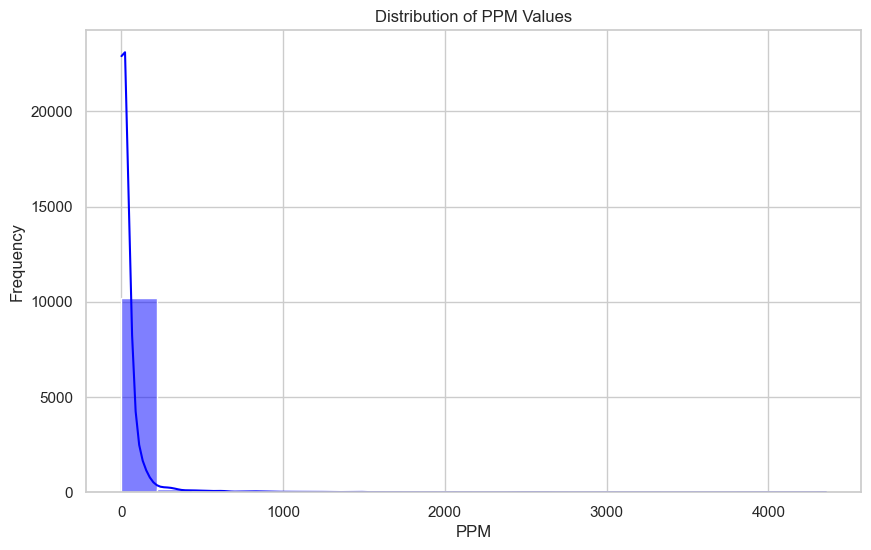

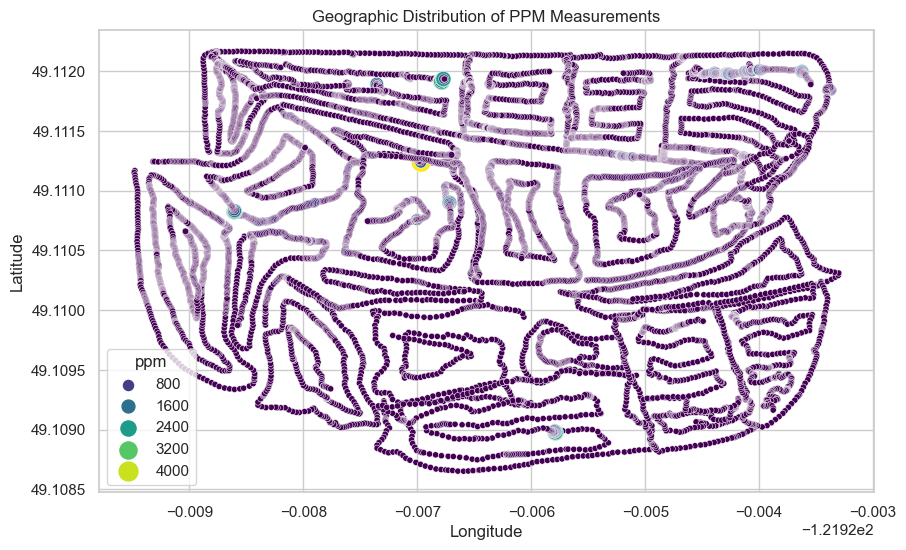

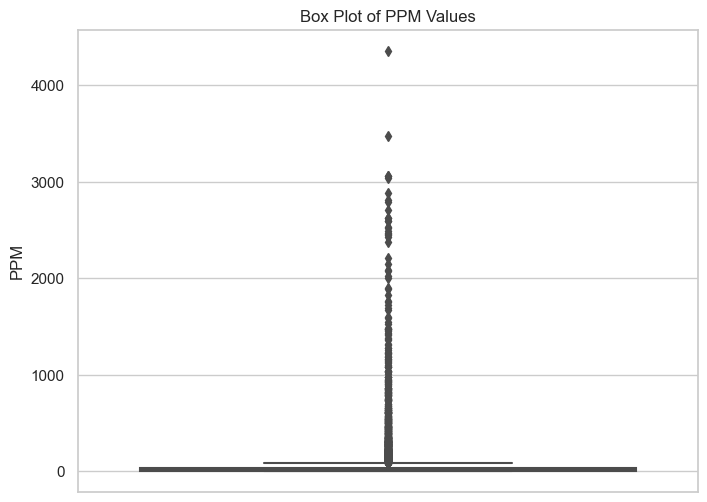

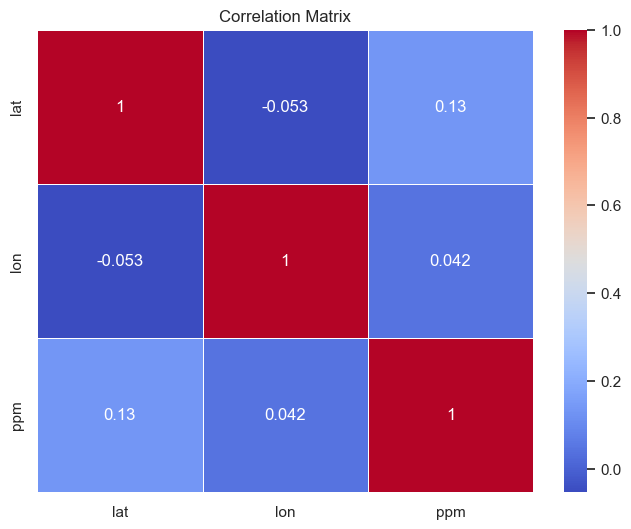

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_excel('Bailey_Python.xlsx')

# Drop rows with NaN values
df = df.dropna(subset=['lat', 'lon', 'ppm'])

# Set the style for the plots
sns.set(style="whitegrid")

# 1. Histogram of PPM Values
plt.figure(figsize=(10, 6))
sns.histplot(df['ppm'], bins=20, kde=True, color='blue')
plt.title('Distribution of PPM Values')
plt.xlabel('PPM')
plt.ylabel('Frequency')
plt.show()

# 2. Scatter Plot of Latitude vs Longitude
plt.figure(figsize=(10, 6))
sns.scatterplot(x='lon', y='lat', size='ppm', hue='ppm', data=df, palette='viridis', sizes=(20, 200))
plt.title('Geographic Distribution of PPM Measurements')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# 3. Box Plot of PPM Values
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['ppm'], color='orange')
plt.title('Box Plot of PPM Values')
plt.ylabel('PPM')
plt.show()

# 4. Heatmap Correlation Matrix
plt.figure(figsize=(8, 6))
corr = df[['lat', 'lon', 'ppm']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()
